## Завдання лабораторної роботи №1

### Виконання основних афінних перетворень на об'єкті з 8 вершин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Initialising object with 8 vertices

In [2]:
vertices = np.array([
    [0.5, 1.5, 1],
    [1, 1, 1],
    [2, 1, 1],
    [2.5, 1.5, 1],
    [2.5, 2, 1],
    [2, 2.5, 1],
    [1, 2.5, 1],
    [0.5, 2, 1]
])


View the Object 

(8, 3)


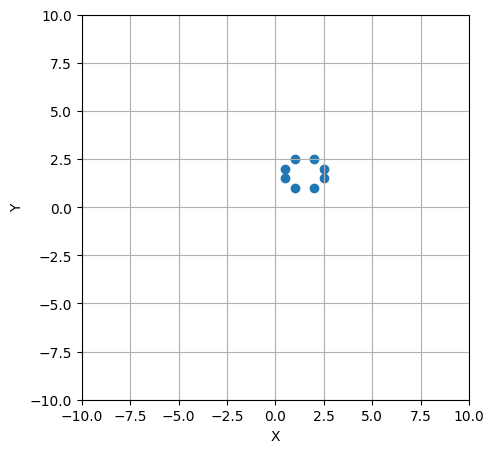

In [3]:
GRAPH = None
def plot_object(vertices):
    global GRAPH
    print(vertices.shape)
    if(vertices.shape[0]==3):
        vertices = vertices.T
    plt.figure(figsize=(5, 5))
    plt.xlim(-10.0, 10.0)
    plt.ylim(-10.0, 10.0)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    GRAPH = plt.scatter(vertices[:, 0], vertices[:, 1])


    plt.show()
    
plot_object(vertices)

Зменшення об'єкта в 1.5 разів (Завдання 2)

(8, 3)


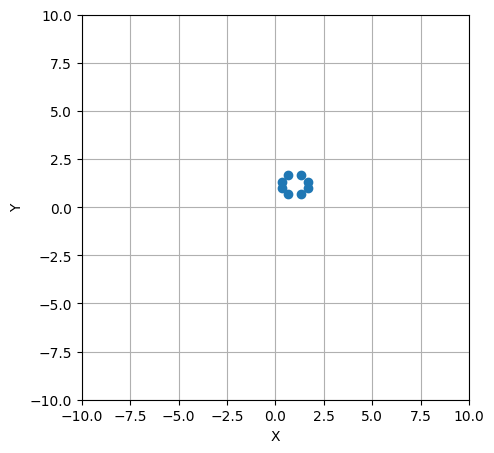

In [4]:
vertices=vertices/1.5
plot_object(vertices)

Симетичне відображення об'єкта відносно початку координат

(3, 8)


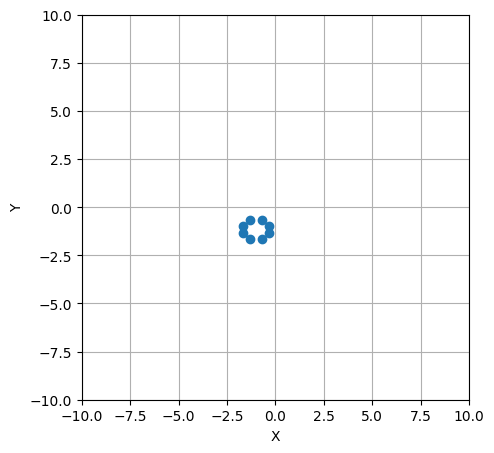

In [5]:
M_reflection = np.array([
    [-1, 0, 0],
    [0, -1, 0],
    [0,  0, 1]
])

plot_object(M_reflection.dot(vertices.T))
# plot_object(vertices.T)

Відображення об'єкта відносно лінії заданої двома точками

From given $(x_1, y_1)$ and $(x_2, y_2)$ as a points we can than define a line.\
It can be done by:\
$\vec{v}=(\Delta{x}, \Delta{y})=(x_2-x_1, y_2-y_1)$\
Angle parameter:\
$k=tg(\alpha)=\vec{v}_y/\vec{v}_x$\
$b$ parameter from line $y=kx+b$\
$b=y-kx=y_1-kx_1$

0.0
2.0 0.0


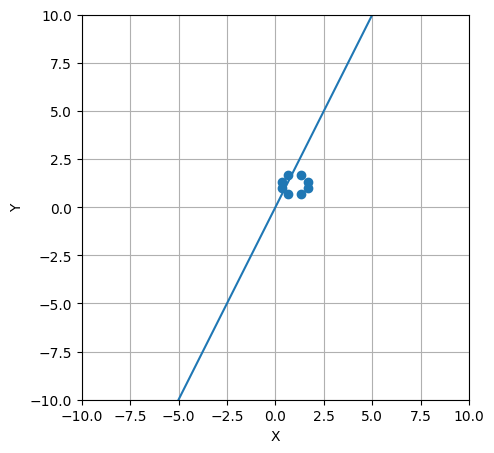

In [6]:
line_points = np.array([[1, 2, 1], 
                        [3, 6, 1]])


def get_line(line_points):
    vector=line_points[1]-line_points[0]
    k=float(vector[1])/vector[0]
    b=line_points[0][1]-k*line_points[0][0]
    print(b)
    x = np.linspace(-200, 200, 100)
    y = k*x+b
    print(k, b)
    return x, y, k

line_x, line_y, k = get_line(line_points)
line = np.stack((line_x, line_y, np.ones(len(line_x)))).T

def plot_object_with_line(vertices, line, size=(200, 200)):
    size_x, size_y = size[0], size[1] 
    
    if(vertices.shape[0]==3):
        vertices = vertices.T
    plt.figure(figsize=(5, 5))
    plt.xlim(-size_x, size_x)
    plt.ylim(-size_y, size_y)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.scatter(vertices[:, 0], vertices[:, 1])
    
    plt.plot(line[:, 0], line[:, 1])
    
plot_object_with_line(vertices, line, (10, 10))



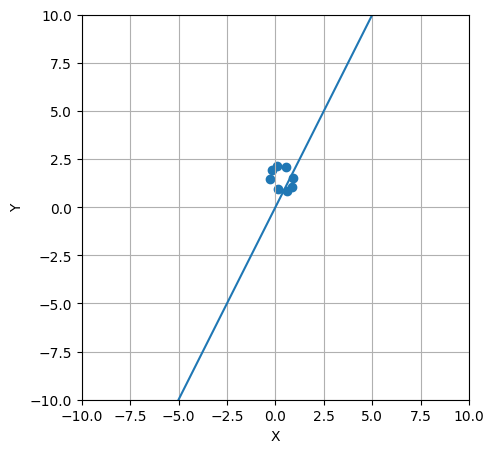

In [7]:
import math as m

alpha = m.atan(k) #k=tg(α)
M_rotate_by_angle = np.array([
    [m.cos(alpha), -m.sin(alpha), 0],
    [m.sin(alpha), m.cos(alpha), 0],
    [0,             0,            1]
])

M_reflect_y = np.array([
    [1,  0, 0],
    [0, -1, 0],
    [0,  0, 1]
])


M_rotate_back_by_angle = np.array([
    [m.cos(-alpha), -m.sin(-alpha), 0],
    [m.sin(-alpha),  m.cos(-alpha), 0],
    [0,             0,            1]
])



operation_rotate_by_line = ((M_rotate_by_angle.dot(M_reflect_y)).dot(M_rotate_back_by_angle)).dot(vertices.T)
plot_object_with_line(operation_rotate_by_line, line, (10, 10))

### Виконання процедур на об'єкті №7

[[109.116  87.49    1.   ]
 [108.008  88.598   1.   ]
 [108.008  89.164   1.   ]]


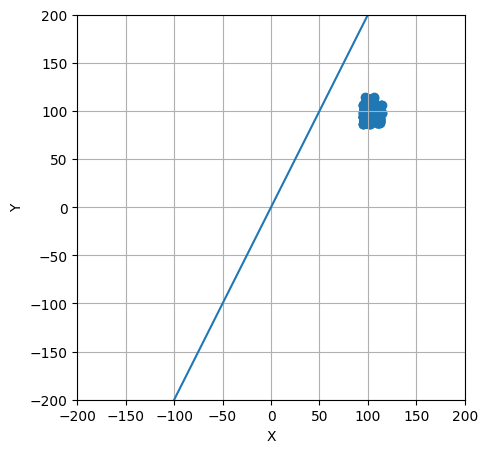

In [8]:
import pandas as pd

pandas_df = pd.read_csv('figure_7.csv')
data = pandas_df.to_numpy()

data = np.c_[data, np.ones(data.shape[0])]
print(data[:3, :])

plot_object_with_line(data, line)

[[  4.5224   6.0736   6.5264]
 [139.7868 139.5652 139.9048]
 [  1.       1.       1.    ]]


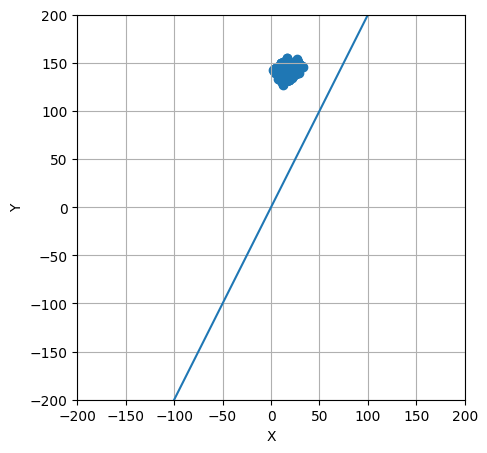

In [9]:
operation_rotate_by_line = ((M_rotate_by_angle.dot(M_reflect_y)).dot(M_rotate_back_by_angle)).dot(data.T)
plot_object_with_line(operation_rotate_by_line, line)
print(operation_rotate_by_line[:, :3])